In [34]:
import pandas as pd
import numpy as np
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import collections
import matplotlib.pyplot as plt
from scipy.stats import linregress

uber = gpd.read_feather('uber_zones.feather')
taxi = gpd.read_feather('taxi_diff.feather')

In [18]:
tot14 = uber['freq14'].sum() + taxi['freq14'].sum()
tot15 = uber['freq15'].sum() + taxi['freq15'].sum()
df = pd.DataFrame({'year': [2014, 2015], 'total': [tot14, tot15], 'uber': [uber['freq14'].sum(), uber['freq15'].sum()], 'taxi': [taxi['freq14'].sum(), taxi['freq15'].sum()]})
df

,year,total,uber,taxi
0,2014,48075439,1847579,46227860
1,2015,50835584,7795104,43040480


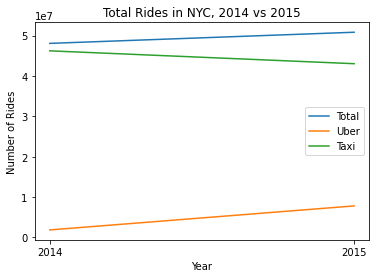

In [24]:
plt.plot(df['year'], df['total'], label='Total')
plt.plot(df['year'], df['uber'], label='Uber')
plt.plot(df['year'], df['taxi'], label='Taxi')
plt.legend()
plt.title('Total Rides in NYC, 2014 vs 2015')
plt.ylabel('Number of Rides')
plt.xlabel('Year')
plt.xticks([2014, 2015])
plt.savefig('Total_over_time.png', dpi=600)

In [19]:
zones = gpd.read_file('shape_files/taxi_zones.shp')

In [20]:
zones['freq14'] = uber['freq14'] + taxi['freq14']
zones['freq15'] = uber['freq15'] + taxi['freq15']

In [21]:
zones['diff'] = zones['freq15'] - zones['freq14']

/home/amit/anaconda3/envs/uber/lib/python3.10/site-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


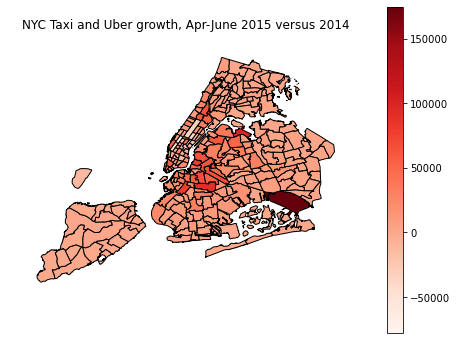

In [46]:
gplt.choropleth(zones, hue='diff', cmap='Reds', legend=True)
plt.title('NYC Taxi and Uber growth, Apr-June 2015 versus 2014')
plt.savefig('Total_diff.png', dpi=600)

<AxesSubplot:>

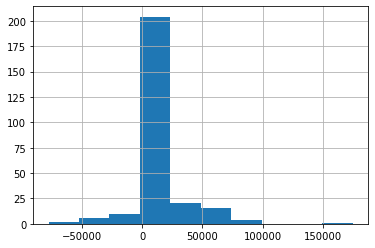

In [23]:
zones['diff'].hist()

In [30]:
zones['diffuber'] = uber['freq15'] - uber['freq14']
zones['difftaxi'] = taxi['freq15'] - taxi['freq14']

In [41]:
res = linregress(zones['diffuber'], zones['difftaxi'])
res._asdict()

{'slope': -0.8625623652547179,
 'intercept': 7386.810765823446,
 'rvalue': -0.8044963918651742,
 'pvalue': 5.4568615774393525e-61,
 'stderr': 0.03941863202515381,
 'intercept_stderr': 1644.2577696921785}

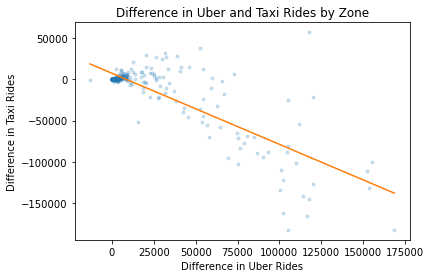

In [49]:
plt.plot(zones['diffuber'], zones['difftaxi'], 'o', alpha=.2, markersize=3)
fx = np.array([zones['diffuber'].min(), zones['diffuber'].max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')
plt.xlabel('Difference in Uber Rides')
plt.ylabel('Difference in Taxi Rides')
plt.title('Difference in Uber and Taxi Rides by Zone')
plt.savefig('scatter.png', dpi=600)